In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Enter your API key here")
project = rf.workspace("Your workspace name").project("Your project name")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Brand-Detection-1 in yolov8:: 100%|██████████| 700/700 [00:00<00:00, 4197.31it/s]


In [ ]:
import os

# Checking if train images exist
train_images_path = 'Brand-Detection-1/train/images'
valid_images_path = 'Brand-Detection-1/valid/images'

print("Training Images:")
print(os.listdir(train_images_path))

print("Validation Images:")
print(os.listdir(valid_images_path))

Training Images:
['himalaya_6_jpg.rf.b1d1b3365a4d346013250e08c0d22735.jpg', 'colgate_0_jpg.rf.9d8779b0ce2e9356c1e2311b77e60662.jpg', 'colgate_22_jpg.rf.670c07cda644a42a7940caba21ca6abf.jpg', 'kellogs_17_jpg.rf.5ff8a74917d4b05ffc9ee0709e325462.jpg', 'IMG_4948_JPG.rf.7ce8e2e64d789908886feed439e69e41.jpg', 'dettol_13_jpg.rf.c1d62b7100db357e5992f2056e3ec1d0.jpg', 'himalaya_14_jpg.rf.44a81c14f35e639270521ff7351475da.jpg', 'IMG_4935_JPG.rf.b5a795e763e0e2a609526df65640e53b.jpg', 'colgate_3_jpg.rf.c7c83b8e9d189ae64c0dfe5ea4db335a.jpg', 'dettol_32_jpg.rf.4decccaff17786a8588d5dffd1f5c6c5.jpg', 'colgate_23_jpg.rf.c73b9c5c5fec79bf5998d28e559d1406.jpg', 'colgate_9_jpg.rf.0626d15dc3b7234c750fae34d7463b7d.jpg', 'classmate_12_jpg.rf.94e6bd0cd3109870dde069c554f91f33.jpg', 'himalaya_17_jpg.rf.d061c30291e5206ea8d474844902a3c6.jpg', 'kellogs_4_jpg.rf.503b0494b0f0033fb88dcbf256225922.jpg', 'classmate_3_jpg.rf.ecfe6a743b9a96104ebd9d6986c7da89.jpg', 'classmate_8_jpg.rf.69d9ac55a7f137e31f3c1da217e605af.jpg', 

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.0/882.0 kB 42.1 MB/s eta 0:00:00


In [ ]:
data = """
names:
- Classmate
- Colgate
- Dettol
- Himalaya
- Kellogs
nc: 5
roboflow:
  license: CC BY 4.0
  project: brand-detection-ussyi
  url: https://universe.roboflow.com/flipkart-grid-ahy1y/brand-detection-ussyi/dataset/1
  version: 1
  workspace: flipkart-grid-ahy1y
test: /content/Brand-Detection-1/test/images
train: /content/Brand-Detection-1/train/images
val: /content/Brand-Detection-1/valid/images
"""

with open('/content/Brand-Detection-1/data.yaml', 'w') as file:
    file.write(data)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # Loading the YOLOv8 model

# Training the model
model.train(data='/content/Brand-Detection-1/data.yaml', epochs=100, imgsz=640, batch=32, cache=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 429MB/s]


Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Brand-Detection-1/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 79.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 268MB/s]


AMP: checks passed ✅


train: Scanning /content/Brand-Detection-1/train/labels... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 2027.06it/s]

train: New cache created: /content/Brand-Detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 543. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.3GB RAM): 100%|██████████| 300/300 [00:00<00:00, 358.32it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Brand-Detection-1/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 1267.28it/s]

val: New cache created: /content/Brand-Detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 45. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 30/30 [00:00<00:00, 207.30it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.96G      2.084      4.441      1.953         30        640: 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all         30         45    0.00398      0.379     0.0161    0.00814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.56G      1.591      4.085      1.564         37        640: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         30         45    0.00587      0.644      0.134     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.59G      1.502      3.451      1.389         19        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         30         45    0.00711      0.752      0.254      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.57G      1.445      2.761       1.34         34        640: 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         30         45    0.00592      0.719      0.304      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.57G      1.431      2.322       1.33         23        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         30         45    0.00523      0.764      0.203      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.59G      1.443      2.146      1.336         33        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         30         45    0.00399      0.677      0.433      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.61G      1.432      1.919      1.311         27        640: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         45      0.706      0.136      0.477      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.58G      1.375      1.812      1.298         30        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         30         45      0.909      0.151      0.465      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.57G      1.398       1.73      1.284         34        640: 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         30         45      0.873      0.161      0.403       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.56G      1.368      1.697      1.255         40        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         30         45      0.395      0.163      0.258      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.59G      1.462       1.68      1.295         36        640: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         30         45      0.726      0.275       0.29      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       7.6G      1.407      1.576      1.299         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         30         45      0.557      0.411      0.458       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.58G      1.348      1.566      1.268         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         30         45      0.382      0.365      0.364      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.63G      1.383      1.432      1.261         44        640: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         30         45      0.663      0.254      0.433      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.61G      1.422      1.458      1.302         26        640: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         30         45      0.263      0.399      0.377      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.59G      1.341      1.332      1.265         22        640: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         30         45      0.593      0.432      0.497      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.54G      1.344       1.34      1.274         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         30         45      0.413      0.436      0.482      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.61G      1.339      1.229      1.212         42        640: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         30         45      0.347      0.537      0.433      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.58G      1.239      1.232       1.22         26        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30         45      0.465      0.561      0.541      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.54G      1.244      1.209      1.228         41        640: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         30         45      0.705       0.63      0.638      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.58G      1.314      1.202      1.227         33        640: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         30         45      0.658      0.569      0.575      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.59G       1.26      1.099      1.203         36        640: 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         30         45      0.595       0.61      0.656      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.61G      1.223       1.04      1.188         30        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         30         45      0.649       0.66      0.682      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.59G      1.249       1.09      1.182         39        640: 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         30         45      0.664       0.81      0.732       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.59G      1.224      1.003      1.159         42        640: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         30         45      0.731      0.781      0.759      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       7.6G      1.203     0.9957      1.176         18        640: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         30         45      0.731      0.816      0.761      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.57G      1.171      1.019      1.163         49        640: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         30         45       0.74      0.714      0.689      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.58G      1.171     0.9851      1.168         37        640: 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         30         45      0.717      0.712      0.726      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.59G       1.14     0.9434      1.162         41        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         30         45      0.826       0.81      0.776      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.54G      1.146      0.973      1.176         25        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         30         45       0.67      0.723       0.64      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.61G      1.175     0.9612       1.18         23        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         30         45      0.682      0.764      0.687      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.58G      1.214     0.9422      1.167         36        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         30         45      0.861      0.729      0.759      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.58G      1.161     0.9123      1.145         35        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         30         45      0.812      0.748      0.763      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.61G      1.142     0.8693       1.15         22        640: 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         30         45      0.826      0.754      0.764      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.58G      1.136     0.8483      1.133         41        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         30         45      0.815      0.773       0.78      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.59G      1.087     0.8268      1.119         32        640: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         30         45      0.838      0.715       0.75       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       7.6G      1.135     0.8807      1.154         52        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         30         45      0.817       0.65      0.743      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.59G      1.067     0.8389      1.107         42        640: 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         30         45       0.82      0.685      0.742      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.56G      1.081     0.8065       1.11         36        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30         45      0.748      0.733      0.767      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.59G      1.073     0.7777      1.118         43        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         30         45      0.705      0.722       0.72      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.58G      1.028     0.7614      1.118         25        640: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         30         45      0.653       0.72      0.699      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       7.6G      1.036     0.7846      1.099         33        640: 100%|██████████| 10/10 [00:07<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         30         45      0.631      0.729      0.729      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.63G      1.031     0.7605      1.067         30        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         30         45      0.834      0.727      0.759      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.58G      1.033     0.7667      1.082         36        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         30         45      0.817      0.703      0.734      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.59G      1.004     0.7537      1.075         37        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         30         45      0.788      0.665      0.675      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.58G     0.9915     0.7315      1.065         26        640: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         30         45      0.753      0.719      0.672      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.56G      1.041     0.7445      1.086         46        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         30         45      0.785      0.786      0.787      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.57G      1.028     0.7375      1.092         25        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         30         45      0.811      0.847      0.804      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.59G      0.938     0.6933      1.047         52        640: 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         30         45      0.842       0.81      0.808      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.56G      1.016     0.7194      1.086         24        640: 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         30         45      0.833      0.811      0.795      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.58G     0.9423     0.6732      1.039         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         30         45      0.832      0.792        0.8      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.59G     0.9801     0.7163       1.05         45        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         30         45      0.739      0.803      0.818      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.59G     0.9617     0.6757      1.047         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         30         45      0.876      0.788      0.843      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.59G     0.9798     0.6755      1.066         24        640: 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         30         45      0.863      0.843      0.794      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       7.6G     0.9592      0.666      1.054         33        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         30         45      0.876      0.833      0.789      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.58G     0.9624     0.6561      1.071         24        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         30         45      0.839      0.814      0.803      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.58G     0.9323      0.635      1.026         36        640: 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         30         45      0.841      0.778      0.807      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.56G     0.8991     0.6312      1.039         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         30         45      0.819      0.813      0.798      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.59G     0.9088     0.6471      1.034         46        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         30         45      0.848      0.847      0.846      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.64G     0.9198     0.6661      1.048         25        640: 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         30         45       0.87      0.857       0.84      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       7.6G     0.9136     0.6262      1.044         31        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         30         45      0.883      0.827      0.843      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.58G     0.8938     0.6232       1.01         44        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         30         45      0.868       0.82      0.838      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.56G     0.9065     0.6181      1.044         20        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         30         45      0.893      0.859      0.852      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.64G     0.8747     0.6165      1.002         38        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         30         45      0.898      0.793      0.841      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.59G     0.8558     0.5935      1.025         27        640: 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         30         45      0.856      0.808      0.802      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.61G     0.8411     0.5928      1.004         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         30         45      0.848      0.822      0.792      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.65G     0.8292     0.5843     0.9952         34        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         30         45      0.859      0.803      0.794      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.56G     0.8254     0.5962      1.022         23        640: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         30         45      0.861      0.823      0.802      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.57G     0.7974     0.5562     0.9892         29        640: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         30         45      0.845      0.831      0.822      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.62G     0.8376     0.5609     0.9874         39        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         30         45      0.857      0.837      0.809      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.57G     0.8025     0.5658     0.9811         44        640: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         30         45      0.852      0.838       0.81      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.59G     0.7823     0.5577     0.9947         38        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         30         45      0.868      0.804      0.813      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.61G     0.7799     0.5595     0.9837         40        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         30         45      0.891      0.782      0.809      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.66G     0.7771     0.5458     0.9879         24        640: 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         30         45       0.84      0.814      0.807      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       7.6G     0.7655     0.5422     0.9785         30        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         30         45       0.85      0.834      0.805      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.55G       0.79     0.5492     0.9978         25        640: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         30         45       0.84      0.806      0.815      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.61G     0.7686     0.5123     0.9723         33        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         30         45      0.826      0.807       0.82       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.56G     0.7601     0.5266      0.983         32        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         30         45      0.809      0.821       0.83      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.57G     0.7425     0.5194      0.967         30        640: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         30         45      0.838      0.804      0.797       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       7.6G     0.7577     0.5454     0.9854         19        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         30         45      0.865      0.836       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.61G     0.7202     0.4965      0.967         32        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         30         45      0.877      0.855       0.82      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.59G     0.7442     0.4949     0.9601         26        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         30         45      0.862      0.865      0.826      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.57G     0.7554     0.5138     0.9744         35        640: 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         45      0.853      0.868      0.826      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.61G      0.734     0.5002     0.9639         21        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         30         45      0.894      0.822      0.841      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.57G     0.7107     0.4839     0.9647         29        640: 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         30         45      0.894      0.794      0.838      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.57G     0.7288     0.4947     0.9742         29        640: 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         30         45      0.831      0.835       0.84      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.61G      0.714     0.4794     0.9553         34        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         30         45      0.836      0.837      0.832      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.57G      0.665     0.4731     0.9571         29        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         30         45      0.857      0.841      0.829      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.56G      0.727     0.4853     0.9597         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         30         45      0.867      0.837      0.839      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.61G     0.6496      0.448      0.939         31        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         30         45      0.865       0.84      0.847      0.557


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.57G     0.7039     0.4989      0.957         14        640: 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         30         45      0.847      0.839      0.841      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.57G     0.7062     0.4573     0.9282         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         30         45      0.848      0.837      0.844      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.56G     0.7057     0.4603     0.9341         16        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         30         45      0.861      0.843      0.843      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.57G     0.6525     0.4502     0.9153         11        640: 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         30         45      0.868      0.842      0.843      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.57G      0.657     0.4454      0.923         23        640: 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         30         45      0.865      0.841       0.84      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.56G     0.6309     0.4283     0.9117         21        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         30         45      0.866      0.839      0.833      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.57G     0.6118     0.4152     0.9053         14        640: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         30         45      0.871      0.836      0.833      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.57G     0.6525     0.4425     0.9234         29        640: 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         30         45      0.871      0.837      0.836      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.57G     0.6458     0.4343     0.9149         20        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         30         45      0.871      0.838      0.841      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.57G     0.6302     0.4341     0.9152         18        640: 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         30         45      0.872      0.838      0.838      0.529



100 epochs completed in 0.205 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 20.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 20.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.6 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,599 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


                   all         30         45      0.865      0.839      0.847      0.557
             Classmate          7          7      0.831      0.702      0.717      0.504
               Colgate          6          8      0.789       0.75      0.808      0.476
                Dettol         12         12      0.884      0.917      0.891      0.655
              Himalaya         10         12      0.832      0.828      0.825      0.582
               Kellogs          6          6      0.987          1      0.995       0.57
Speed: 0.5ms preprocess, 4.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c7d679c550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        


image 1/1 /content/download4.jpeg: 640x480 1 Classmate, 1 Colgate, 12.1ms
Speed: 2.9ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Detected label: Colgate, Count: 1
Detected label: Classmate, Count: 1


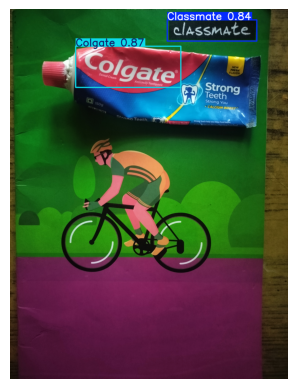

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import cv2

model = YOLO('/content/runs/detect/train/weights/best.pt')

# Running inference on the image
image_path = '/content/download4.jpeg'  # Replacing with the path to your test image
results = model(image_path)

label_counts = defaultdict(int)

# Set the confidence threshold
confidence_threshold = 0.5

# Extract labels and count occurrences for detections with confidence > 0.5
for result in results:    
    filtered_boxes = []
    for box in result.boxes:
        if box.conf > confidence_threshold:  
            filtered_boxes.append(box) 
            class_id = int(box.cls)  
            label = model.names[class_id]  
            label_counts[label] += 1  

    # Replace the original boxes with the filtered boxes
    result.boxes = filtered_boxes

# Prints the counts for each detected label
for label, count in label_counts.items():
    print(f"Detected label: {label}, Count: {count}")

results[0].plot()

img_with_boxes = results[0].plot(show=False) 
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()